In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/drive/MyDrive/LC25000.zip'
extract_path = '/content/lc2500_dataset'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
lung_images_path = os.path.join(extract_path, 'lung_colon_image_set', 'lung_image_sets')

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, VGG16, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  #
)


train_generator = train_datagen.flow_from_directory(
    lung_images_path,  # Path to lung cancer data
    target_size=(224, 224),  # Resize images to match model input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    lung_images_path,  # Path to lung cancer data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


**Model 1-EfficientNetB0**

In [ ]:
# Load pre-trained EfficientNetB0 model without the top layer
base_model_1= EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model_1.trainable = False


x = base_model_1.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Adding a dense layer for better feature extraction
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer for 3 classes (lung_scc, lung_n, lung_aca)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model_1= Model(inputs=base_model_1.input, outputs=predictions)

model_1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model_1.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 269s 641ms/step - accuracy: 0.3199 - loss: 1.1070 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 214s 559ms/step - accuracy: 0.3298 - loss: 1.0988 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 265s 572ms/step - accuracy: 0.3344 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 260s 568ms/step - accuracy: 0.3282 - loss: 1.0988 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 262s 569ms/step - accuracy: 0.3263 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 264s 572ms/step - accuracy: 0.3289 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 215s 564ms/step - accuracy: 0.3357 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 303s 671ms/step - accuracy: 0.3303 - loss: 1.09

In [ ]:
# Save the model after initial training
model_1.save('/content/drive/MyDrive/EfficientNetB0_initial.keras')

In [ ]:
#Fine Tuning
base_model_1.trainable = True

model_1.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model_1.fit(train_generator, validation_data=validation_generator, epochs=10)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 318s 629ms/step - accuracy: 0.7704 - loss: 0.6280 - val_accuracy: 0.3473 - val_loss: 238.1977
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 266s 594ms/step - accuracy: 0.9419 - loss: 0.1659 - val_accuracy: 0.4920 - val_loss: 9.1065
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 266s 607ms/step - accuracy: 0.9602 - loss: 0.1073 - val_accuracy: 0.9707 - val_loss: 0.0786
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 226s 594ms/step - accuracy: 0.9705 - loss: 0.0887 - val_accuracy: 0.9850 - val_loss: 0.0464
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 226s 594ms/step - accuracy: 0.9740 - loss: 0.0705 - val_accuracy: 0.9887 - val_loss: 0.0343
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 262s 595ms/step - accuracy: 0.9781 - loss: 0.0597 - val_accuracy: 0.9927 - val_loss: 0.0246
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 264s 601ms/step - accuracy: 0.9838 - loss: 0.0483 - val_accuracy: 0.9930 - val_loss: 0.0168
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 262s 602ms/step - accuracy: 0.9853

In [ ]:
model_1.save('/content/drive/MyDrive/EfficientNetB0_finetuned.keras')

In [ ]:
val_loss, val_accuracy = model_1.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy}")
train_loss, train_accuracy = model_1.evaluate(train_generator)
print(f"Training Accuracy: {train_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 481ms/step - accuracy: 0.9979 - loss: 0.0102
Validation Accuracy: 0.9953333139419556
375/375 ━━━━━━━━━━━━━━━━━━━━ 172s 460ms/step - accuracy: 0.9990 - loss: 0.0066
Training Accuracy: 0.9987499713897705


94/94 ━━━━━━━━━━━━━━━━━━━━ 54s 499ms/step


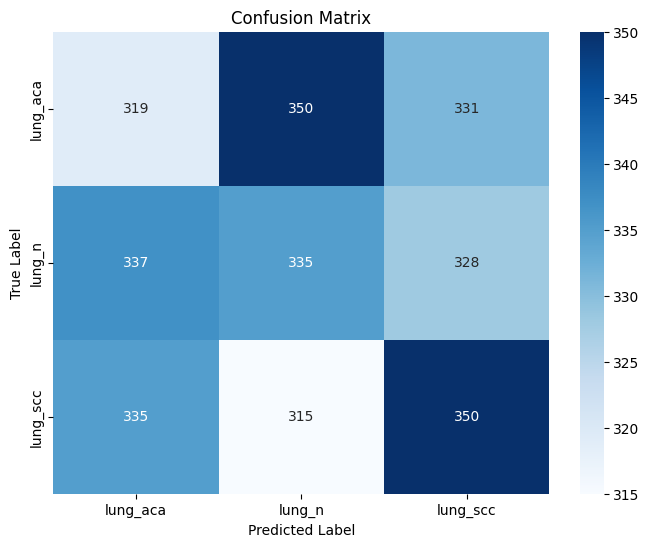


Classification Report:
               precision    recall  f1-score   support

    lung_aca       0.32      0.32      0.32      1000
      lung_n       0.34      0.34      0.34      1000
    lung_scc       0.35      0.35      0.35      1000

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Predict on validation data
val_preds = model_1.predict(validation_generator)
val_preds_classes =np.argmax(val_preds, axis=1)
true_classes = validation_generator.classes


# Create confusion matrix
cm = confusion_matrix(true_classes, val_preds_classes)
class_names = list(validation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(true_classes, val_preds_classes, target_names=validation_generator.class_indices.keys()))

**Model 2- VGG16**

In [ ]:
base_model_2= VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_2.trainable = False
x = base_model_2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model_2= Model(inputs=base_model_2.input, outputs=predictions)
model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_2.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 293s 734ms/step - accuracy: 0.8843 - loss: 0.3026 - val_accuracy: 0.9553 - val_loss: 0.1179
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 231s 610ms/step - accuracy: 0.9535 - loss: 0.1176 - val_accuracy: 0.9527 - val_loss: 0.1158
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 258s 601ms/step - accuracy: 0.9539 - loss: 0.1197 - val_accuracy: 0.9483 - val_loss: 0.1244
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 298s 698ms/step - accuracy: 0.9551 - loss: 0.1115 - val_accuracy: 0.9410 - val_loss: 0.1408
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 285s 597ms/step - accuracy: 0.9550 - loss: 0.1089 - val_accuracy: 0.9483 - val_loss: 0.1232
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 230s 605ms/step - accuracy: 0.9598 - loss: 0.0994 - val_accuracy: 0.9643 - val_loss: 0.0905
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 236s 620ms/step - accuracy: 0.9626 - loss: 0.0930 - val_accuracy: 0.9233 - val_loss: 0.1908
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 298s 716ms/step - accuracy: 0.9608 - loss: 0.10

In [ ]:
model_2.save('/content/drive/MyDrive/VGG16.keras')

In [ ]:
val_loss, val_accuracy = model_2.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy}")
train_loss, train_accuracy = model_2.evaluate(train_generator)
print(f"Training Accuracy: {train_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 47s 502ms/step - accuracy: 0.9462 - loss: 0.1446
Validation Accuracy: 0.9409999847412109
375/375 ━━━━━━━━━━━━━━━━━━━━ 185s 492ms/step - accuracy: 0.9453 - loss: 0.1434
Training Accuracy: 0.9456666707992554


94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 444ms/step
Confusion Matrix:
 [[385 353 262]
 [401 321 278]
 [409 306 285]]


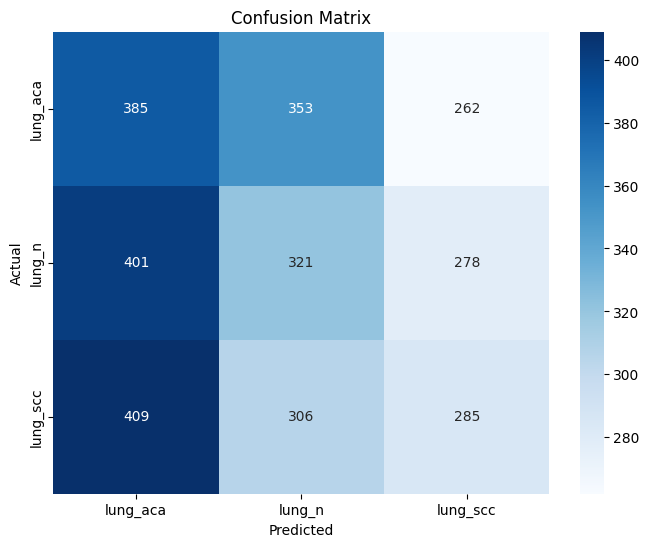


Classification Report:
               precision    recall  f1-score   support

    lung_aca       0.32      0.39      0.35      1000
      lung_n       0.33      0.32      0.32      1000
    lung_scc       0.35      0.28      0.31      1000

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



In [ ]:
val_preds = model_2.predict(validation_generator)
val_preds_classes = np.argmax(val_preds, axis=1)  # Get the index of the class with the highest prediction score
val_true_classes = validation_generator.classes  # Get the true class labels

# Confusion Matrix
cm = confusion_matrix(val_true_classes, val_preds_classes)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(val_true_classes, val_preds_classes, target_names=validation_generator.class_indices.keys()))

**Model 3- InceptionV3**

In [ ]:
# Load the InceptionV3 model without the top layer (ImageNet weights)
base_model_3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model_3 .trainable = False

# Add custom layers on top of InceptionV3
x = base_model_3.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Dense layer for feature extraction
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer for your classes

# Create the full model
model_3= Model(inputs=base_model_3.input, outputs=predictions)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Compile the model
model_3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with frozen base layers
model_3.fit(train_generator, validation_data=validation_generator, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 2505s 7s/step - accuracy: 0.8190 - loss: 0.7045 - val_accuracy: 0.9277 - val_loss: 0.1764
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2477s 6s/step - accuracy: 0.9281 - loss: 0.1724 - val_accuracy: 0.9333 - val_loss: 0.1625
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2411s 6s/step - accuracy: 0.9425 - loss: 0.1450 - val_accuracy: 0.9283 - val_loss: 0.1738
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2375s 6s/step - accuracy: 0.9487 - loss: 0.1282 - val_accuracy: 0.9490 - val_loss: 0.1281
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2308s 6s/step - accuracy: 0.9487 - loss: 0.1300 - val_accuracy: 0.9503 - val_loss: 0.1344
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2298s 6s/step - accuracy: 0.9553 - loss: 0.1124 - val_accuracy: 0.9533 - val_loss: 0.1154
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2316s 6s/step - accuracy: 0.9543 - loss: 0.1133 - val_accuracy: 0.9617 - val_loss: 0.1099
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2305s 6s/step - accuracy: 0.9575 - loss: 0.1075 - val_accurac

In [ ]:
model_3.save('/content/drive/MyDrive/InceptionV3.keras')

In [ ]:
val_loss, val_accuracy = model_3.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy}")
train_loss, train_accuracy = model_3.evaluate(train_generator)
print(f"Training Accuracy: {train_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 475s 5s/step - accuracy: 0.9695 - loss: 0.0731
Validation Accuracy: 0.9670000076293945
375/375 ━━━━━━━━━━━━━━━━━━━━ 1785s 5s/step - accuracy: 0.9693 - loss: 0.0812
Training Accuracy: 0.968416690826416


94/94 ━━━━━━━━━━━━━━━━━━━━ 481s 5s/step
Confusion Matrix:
 [[337 326 337]
 [330 345 325]
 [339 325 336]]


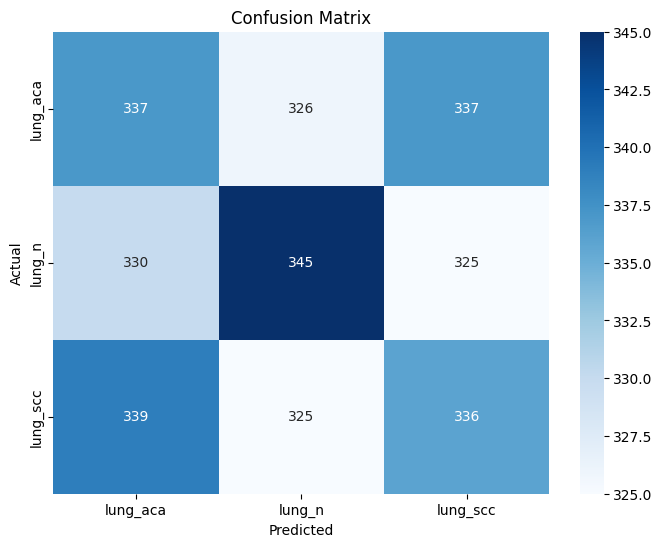


Classification Report:
               precision    recall  f1-score   support

    lung_aca       0.33      0.34      0.34      1000
      lung_n       0.35      0.34      0.35      1000
    lung_scc       0.34      0.34      0.34      1000

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



In [ ]:
val_preds = model_3.predict(validation_generator)
val_preds_classes = np.argmax(val_preds, axis=1)  # Get the index of the class with the highest prediction score
val_true_classes = validation_generator.classes  # Get the true class labels

# Confusion Matrix
cm = confusion_matrix(val_true_classes, val_preds_classes)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(val_true_classes, val_preds_classes, target_names=validation_generator.class_indices.keys()))